## Preprocessing

In [26]:
import pandas as pd
from numpy import array
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("Titanic_data.csv")
values =array(df["Sex"])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
values=pd.DataFrame(integer_encoded)
df=df.drop(["Sex"],axis=1)
df= pd.concat([values, df], axis=1, join='inner')
df.rename(columns={0:"Sex"}, inplace=True)
df.fillna(df.mean(), inplace=True)

## Split data to train and test

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
data=train_set.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
       'Ticket', 'Cabin', 'Embarked','Survived'],axis=1)
target=train_set["Survived"]

## Use decision tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier
X = data
y = target
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualize decision tree

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file= "Survived_tree.dot",
    feature_names=data.columns,
    class_names=["Survive","not survived"],
    rounded=True,
    filled=True
)

In [32]:
#import graphviz
#with open("Survived_tree.dot") as f:
    #dot_graph = f.read()
#dot = graphviz.Source(dot_graph)
#dot.format = 'png'
#dot.render(filename='Survived_tree', directory="DT", cleanup=True)
#dot

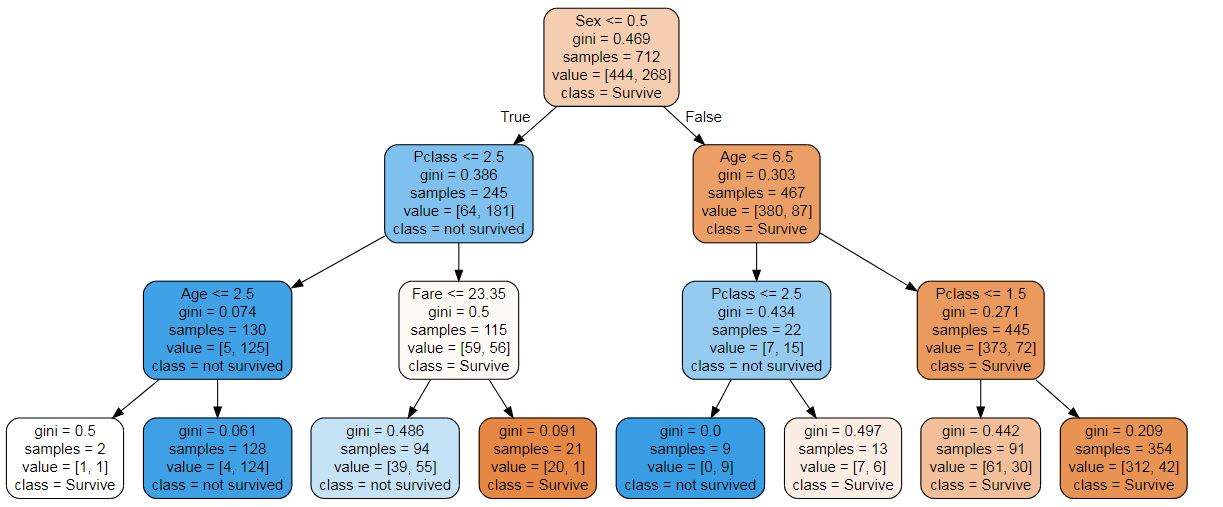

In [34]:
from IPython.display import Image #if graphviz not found 
Image("tree.jpg")

## Calculate the score of model

In [36]:
from sklearn.metrics import accuracy_score
X2=test_set.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
       'Ticket', 'Cabin', 'Embarked','Survived'],axis=1)
y2=test_set["Survived"]
y_pred = tree_clf.predict(X2)
print(accuracy_score(y2, y_pred))

0.7988826815642458
